In [19]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset and skip the first 4 rows and last column
data = pd.read_csv('world_bank_population.csv', skiprows=4)
data = data.iloc[:,:-1]

# Display the first few rows to check if it loads correctly
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0


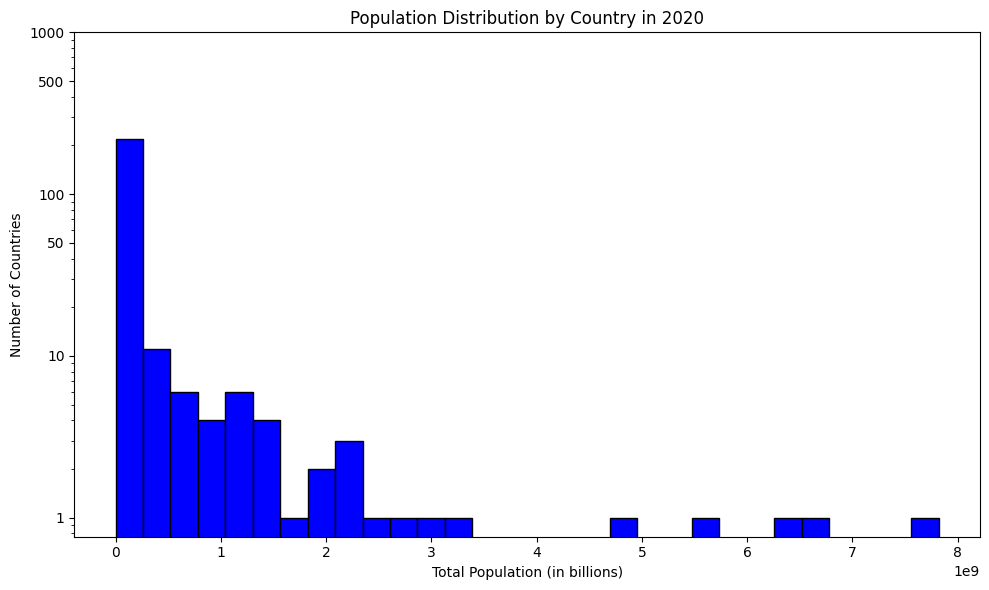

In [32]:
# Filter data for the year 2020
population_data = data[['Country Name', '2020']].dropna()

# Rename columns for clarity
population_data.columns = ['Country', 'Population']

# Create a histogram for the population distribution in 2020 with a logarithmic scale
plt.figure(figsize=(10, 6))
plt.hist(population_data['Population'], bins=30, color='blue', edgecolor='black', log=True)
plt.xlabel('Total Population (in billions)')
plt.ylabel('Number of Countries')
plt.title('Population Distribution by Country in 2020')

# Convert the y-axis to regular numbers
y_ticks = [1, 10, 50, 100, 500, 1000]
plt.yticks(y_ticks, [f"{tick}" for tick in y_ticks])
plt.tight_layout()

# Adding a legend with units
# plt.annotate('Units: Number of Countries', xy=(0.75, 0.9), xycoords='axes fraction', fontsize=12, color='blue')

plt.show()


In [33]:
# Load net migration data and skip the first 4 rows
migration_data = pd.read_csv('world_bank_migration.csv', skiprows=4)

# Filter data for the year 2020 and rename columns for clarity
migration_data = migration_data[['Country Name', '2020']].dropna()
migration_data.columns = ['Country', 'Net Migration']

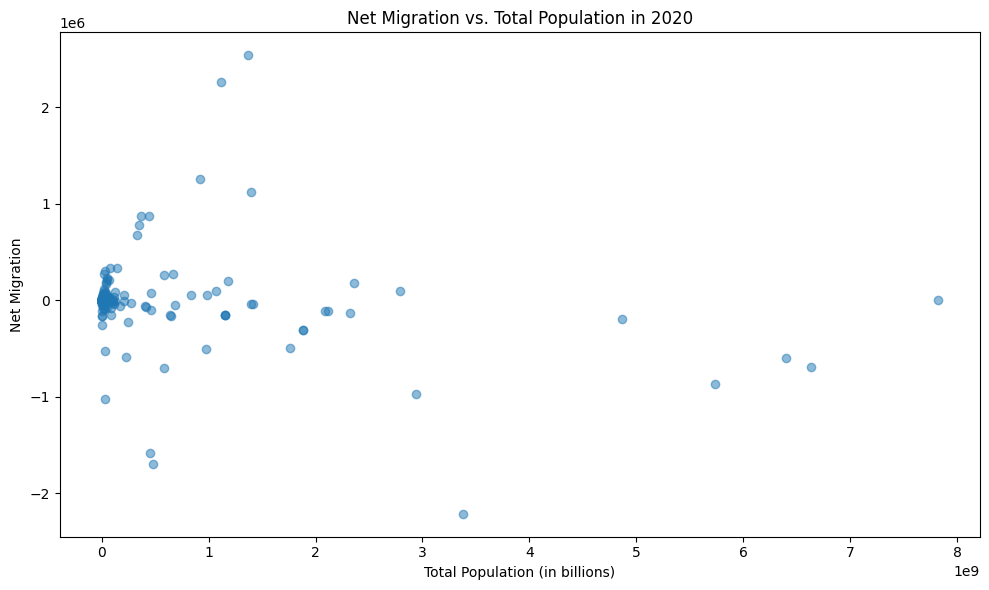

In [34]:
# Merge population data with net migration data
merged_data = pd.merge(population_data, migration_data, on='Country')

# Create a scatter plot to visualize the relationship between Population and Net Migration
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Population'], merged_data['Net Migration'], alpha=0.5)
plt.xlabel('Total Population (in billions)')
plt.ylabel('Net Migration')
plt.title('Net Migration vs. Total Population in 2020')
plt.tight_layout()
plt.show()